# Network Analysis with Python


- This interactive Jupyter Notebook provides a hands-on guide to Social Network Analysis using Python and NetworkX. Through real examples and exercises, students will explore graph theory concepts, data importation, network visualization, centrality measures, structural analysis, path analysis, resilience assessment, and community detection. This notebook engages students in understanding the relationships and patterns within GitHub organizations' networks, fostering skills in data transformation, algorithm implementation, and advanced network analytics.

## Import necessary libraries


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.algorithms import bipartite
from networkx.algorithms.centrality import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality


## 1. Load the dataset

In [2]:
# Load the dataset from CSV, remove any rows where members are missing

full_data = pd.read_csv('/content/data_nets.csv')  # Adjust the path to your dataset
full_data.dropna(subset=['member'], inplace=True)  # Remove rows where member is None

# Set a seed for reproducibility and randomly select 100 rows
data = full_data.sample(n=100, random_state=2)


display(data)

,Organisation,member
5735,atom,Musa Ibrahim
6139,facebook,Andrew Clark
4854,Azure,Perry Skountrianos
8828,microsoft,Kyle Reed
1454,apache,Jordan Zimmerman
...,...,...
893,google,Jason Mayes
5138,Azure,Sven Gruenitz
1701,apache,Dinesh
7732,microsoft,Andrew Au


## 2. Create a Bipartite Graph

In [3]:
# Bipartite Graph Creation: Create a bipartite graph with organizations and members.
B = nx.Graph()
B.add_nodes_from(data['Organisation'].unique(), bipartite=0)  # Add organizations as one set of nodes
B.add_nodes_from(data['member'].unique(), bipartite=1)  # Add members as the other set of nodes

# Add edges between organizations and members
for index, row in data.iterrows():
    B.add_edge(row['Organisation'], row['member'])


## 3. Visualize the Network


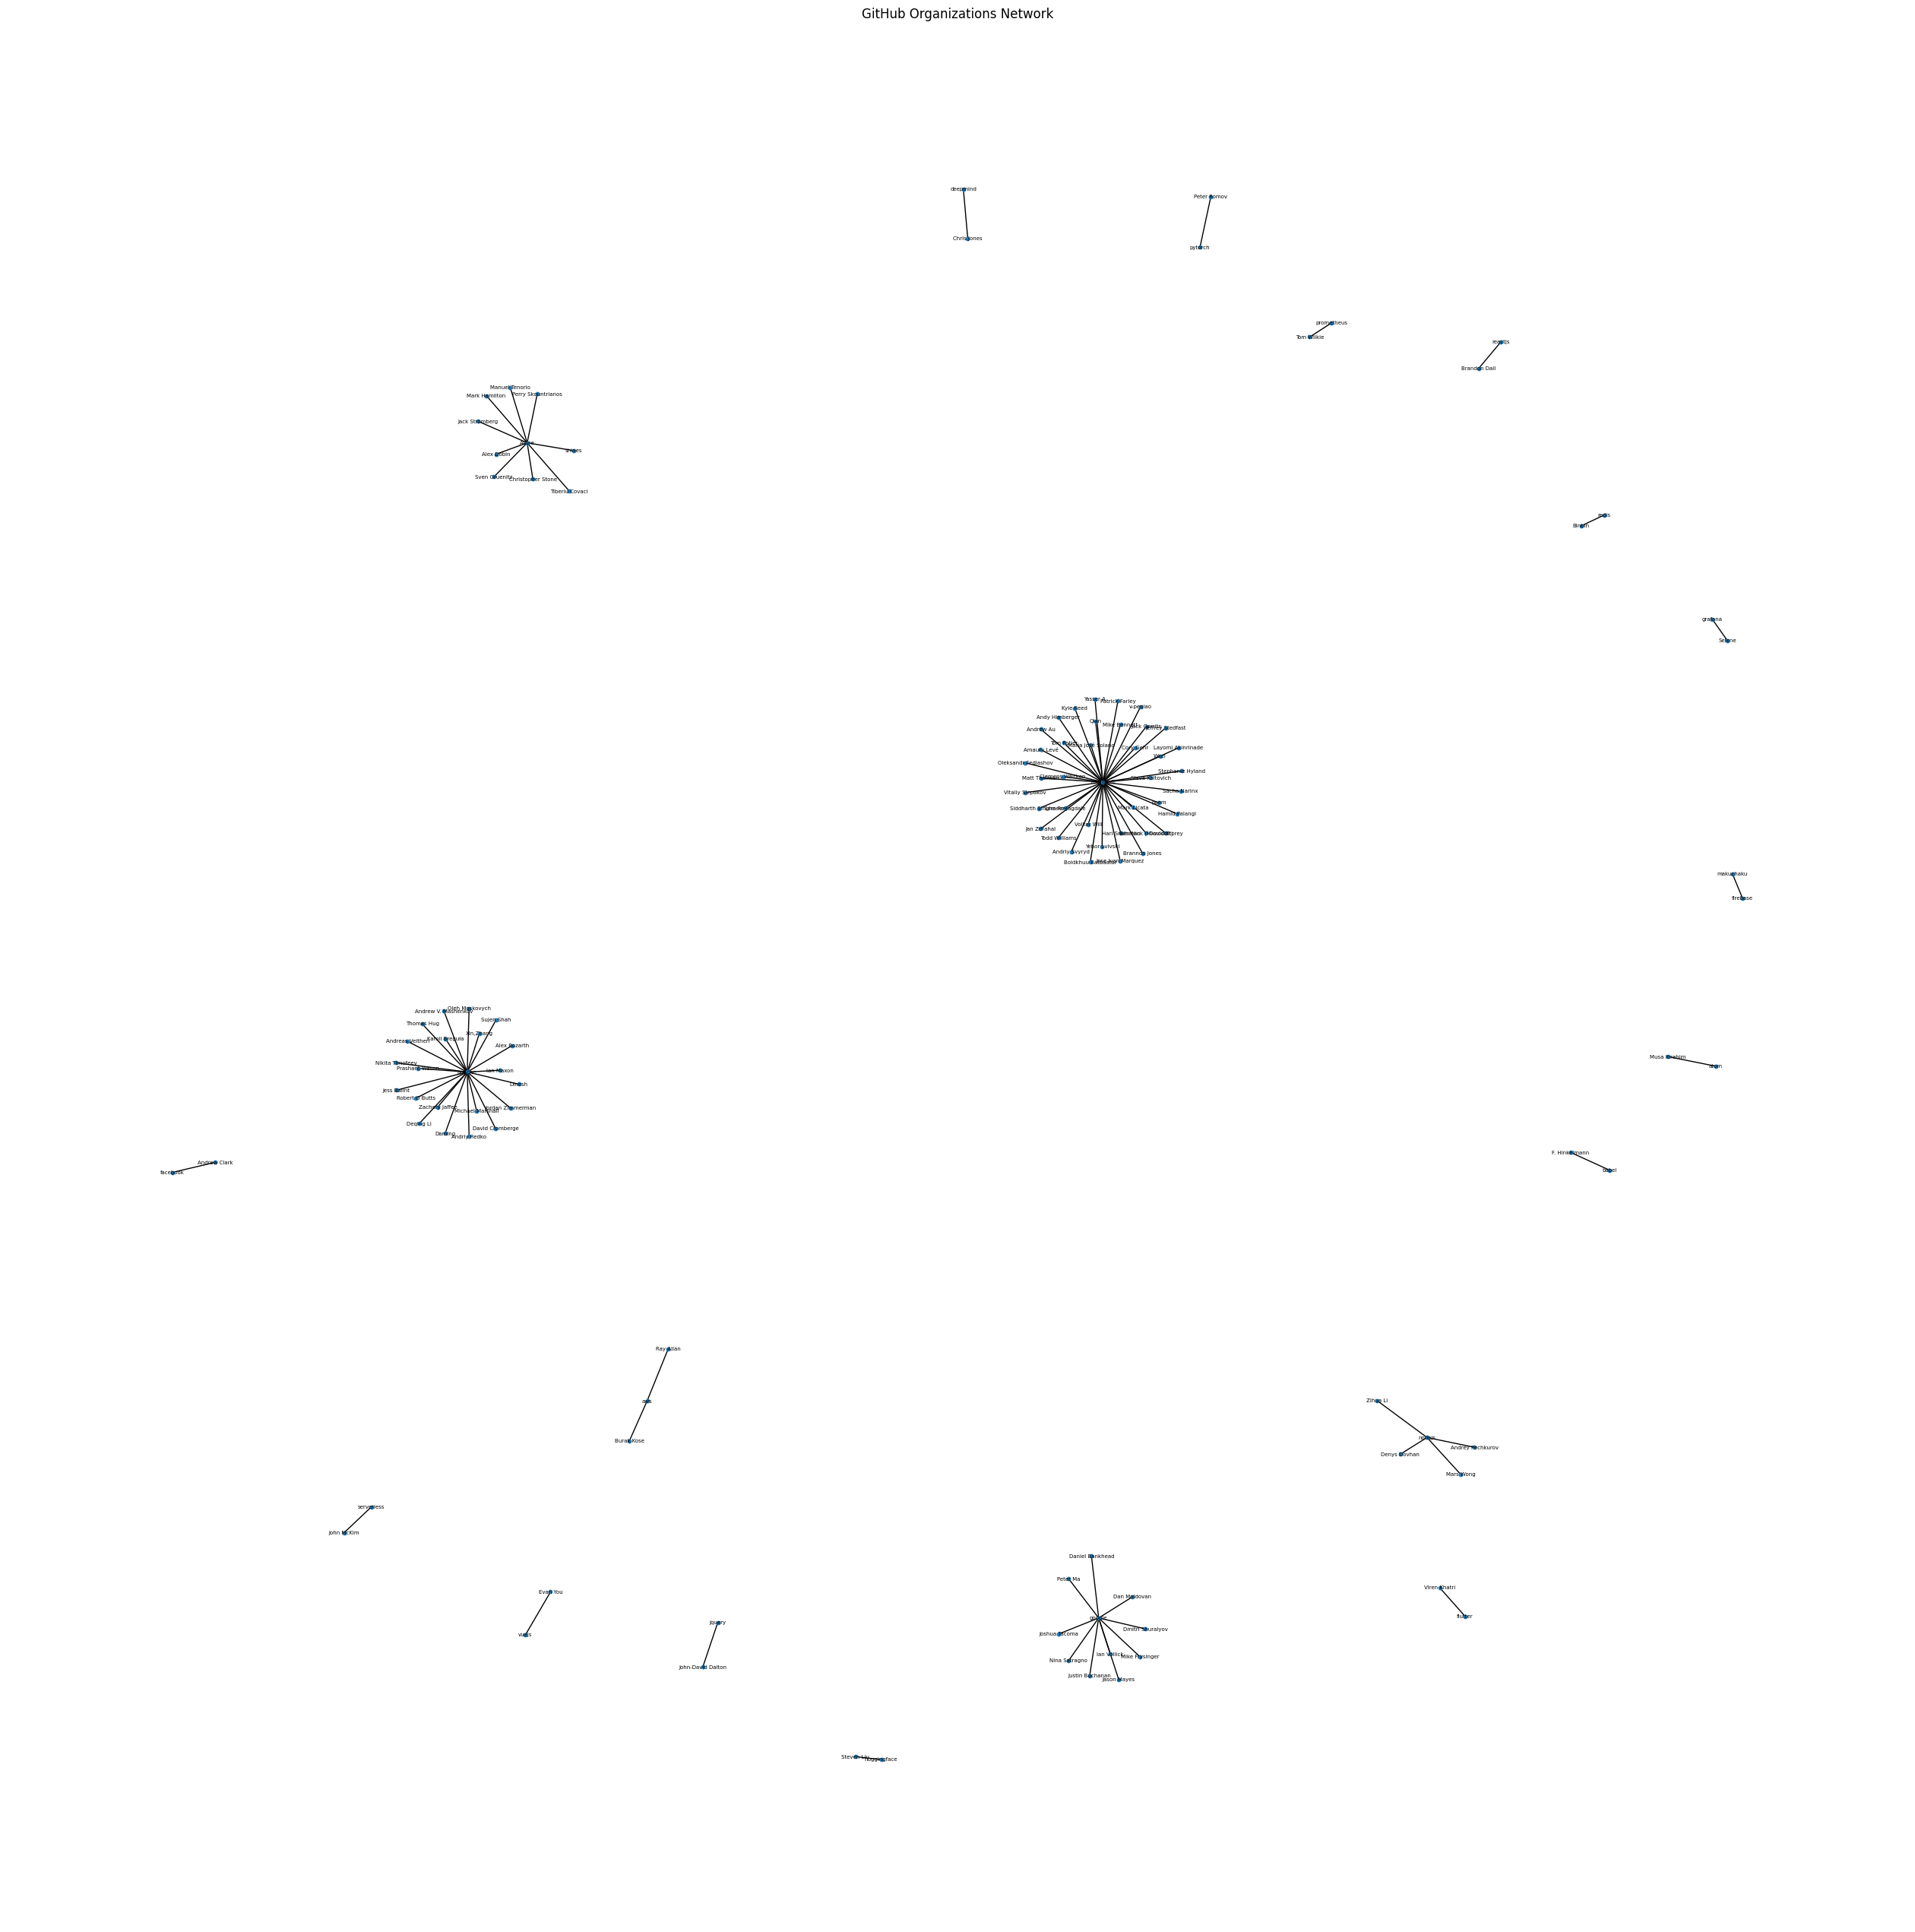

In [4]:
# Use NetworkX's draw function to visualize the network.

plt.figure(figsize=(25, 25))
# Generate positions for nodes using the spring layout, which places nodes based on a force-directed algorithm
pos = nx.spring_layout(B)
# Draw the graph with specified positions, enabling labels for nodes, and setting node and font sizes
nx.draw(B, pos, with_labels=True, node_size=10, font_size=5)
# Add a title to the plot for context
plt.title("GitHub Organizations Network")
plt.show()


## 4. Structural Analysis and Properties

In [5]:
# Calculate Degree Centrality
deg_centrality = degree_centrality(B)
print("Degree Centrality:", deg_centrality)

Degree Centrality: {'atom': 0.008333333333333333, 'facebook': 0.008333333333333333, 'Azure': 0.075, 'microsoft': 0.325, 'apache': 0.175, 'aws': 0.016666666666666666, 'google': 0.08333333333333333, 'prometheus': 0.008333333333333333, 'firebase': 0.008333333333333333, 'nodejs': 0.03333333333333333, 'jquery': 0.008333333333333333, 'reactjs': 0.008333333333333333, 'deepmind': 0.008333333333333333, 'flutter': 0.008333333333333333, 'huggingface': 0.008333333333333333, 'vuejs': 0.008333333333333333, 'serverless': 0.008333333333333333, 'redis': 0.008333333333333333, 'grafana': 0.008333333333333333, 'pytorch': 0.008333333333333333, 'babel': 0.008333333333333333, 'Musa Ibrahim': 0.008333333333333333, 'Andrew Clark': 0.008333333333333333, 'Perry Skountrianos': 0.008333333333333333, 'Kyle Reed': 0.008333333333333333, 'Jordan Zimmerman': 0.008333333333333333, 'Burak Kose': 0.008333333333333333, 'Patrick Farley': 0.008333333333333333, 'Jess Balint': 0.008333333333333333, 'Jack Stromberg': 0.00833333

In [6]:
# Calculate Closeness Centrality
closeness = closeness_centrality(B)
print("Closeness Centrality:", closeness)

Closeness Centrality: {'atom': 0.008333333333333333, 'facebook': 0.008333333333333333, 'Azure': 0.075, 'microsoft': 0.325, 'apache': 0.175, 'aws': 0.016666666666666666, 'google': 0.08333333333333333, 'prometheus': 0.008333333333333333, 'firebase': 0.008333333333333333, 'nodejs': 0.03333333333333333, 'jquery': 0.008333333333333333, 'reactjs': 0.008333333333333333, 'deepmind': 0.008333333333333333, 'flutter': 0.008333333333333333, 'huggingface': 0.008333333333333333, 'vuejs': 0.008333333333333333, 'serverless': 0.008333333333333333, 'redis': 0.008333333333333333, 'grafana': 0.008333333333333333, 'pytorch': 0.008333333333333333, 'babel': 0.008333333333333333, 'Musa Ibrahim': 0.008333333333333333, 'Andrew Clark': 0.008333333333333333, 'Perry Skountrianos': 0.039705882352941174, 'Kyle Reed': 0.1646103896103896, 'Jordan Zimmerman': 0.08963414634146341, 'Burak Kose': 0.01111111111111111, 'Patrick Farley': 0.1646103896103896, 'Jess Balint': 0.08963414634146341, 'Jack Stromberg': 0.039705882352

In [7]:
# Calculate Betweenness Centrality
betweenness = betweenness_centrality(B)
print("Betweenness Centrality:", betweenness)

Betweenness Centrality: {'atom': 0.0, 'facebook': 0.0, 'Azure': 0.0050420168067226885, 'microsoft': 0.10378151260504201, 'apache': 0.029411764705882353, 'aws': 0.00014005602240896358, 'google': 0.006302521008403361, 'prometheus': 0.0, 'firebase': 0.0, 'nodejs': 0.0008403361344537815, 'jquery': 0.0, 'reactjs': 0.0, 'deepmind': 0.0, 'flutter': 0.0, 'huggingface': 0.0, 'vuejs': 0.0, 'serverless': 0.0, 'redis': 0.0, 'grafana': 0.0, 'pytorch': 0.0, 'babel': 0.0, 'Musa Ibrahim': 0.0, 'Andrew Clark': 0.0, 'Perry Skountrianos': 0.0, 'Kyle Reed': 0.0, 'Jordan Zimmerman': 0.0, 'Burak Kose': 0.0, 'Patrick Farley': 0.0, 'Jess Balint': 0.0, 'Jack Stromberg': 0.0, 'Andy Himberger': 0.0, 'Daniel Bankhead': 0.0, 'Zachary Jaffee': 0.0, 'Tom Wilkie': 0.0, 'Thomas Hug': 0.0, 'Tiberiu Covaci': 0.0, 'Mark Hamilton': 0.0, 'Ray Allan': 0.0, 'Ian Vollick': 0.0, 'Nina Satragno': 0.0, 'Alex Dobin': 0.0, 'Mike Frysinger': 0.0, 'makuchaku': 0.0, 'Clemens Wältken': 0.0, 'Mars Wong': 0.0, 'Oleksandr Fediashov': 0.0

In [8]:
# Calculate Eigenvector Centrality
eigenvector = eigenvector_centrality(B)
print("Eigenvector Centrality:", eigenvector)

Eigenvector Centrality: {'atom': 4.0473483352247742e-22, 'facebook': 4.0473483352247742e-22, 'Azure': 1.1125266390639154e-10, 'microsoft': 0.7071100790764338, 'apache': 3.529769499219844e-05, 'aws': 5.170193426795406e-19, 'google': 5.042089784156798e-10, 'prometheus': 4.0473483352247742e-22, 'firebase': 4.0473483352247742e-22, 'nodejs': 1.989016691608162e-15, 'jquery': 4.0473483352247742e-22, 'reactjs': 4.0473483352247742e-22, 'deepmind': 4.0473483352247742e-22, 'flutter': 4.0473483352247742e-22, 'huggingface': 4.0473483352247742e-22, 'vuejs': 4.0473483352247742e-22, 'serverless': 4.0473483352247742e-22, 'redis': 4.0473483352247742e-22, 'grafana': 4.0473483352247742e-22, 'pytorch': 4.0473483352247742e-22, 'babel': 4.0473483352247742e-22, 'Musa Ibrahim': 4.0473483352247742e-22, 'Andrew Clark': 4.0473483352247742e-22, 'Perry Skountrianos': 3.7084221301860685e-11, 'Kyle Reed': 0.11322717504482943, 'Jordan Zimmerman': 7.702587794547432e-06, 'Burak Kose': 3.6558788321331444e-19, 'Patrick Fa

In [9]:
# Identify Connected Components
connected_components = list(nx.connected_components(B))
print("Connected Components:", connected_components)

Connected Components: [{'Musa Ibrahim', 'atom'}, {'facebook', 'Andrew Clark'}, {'Perry Skountrianos', 'Alex Dobin', 'shines', 'Azure', 'Mark Hamilton', 'Manuel Tenorio', 'Sven Gruenitz', 'Tiberiu Covaci', 'Christopher Stone', 'Jack Stromberg'}, {'Cory Gehr', 'Oleksandr Fediashov', 'Patrick Farley', 'Vitaliy Slepakov', 'Boldkhuu Batbaatar', 'Stephanie Hyland', 'Mark Licata', 'Layomi Akinrinade', 'Mike Bennett', 'Hamid Palangi', 'Yehor Lvivski', 'Andriy Svyryd', 'Jose Ivan Marquez', 'Amaury Levé', 'Slava Koltovich', 'Qian', 'Andrew Au', 'Jan Zdrahal', 'Brannon Jones', 'microsoft', 'Hari Sridharan', 'Clemens Wältken', 'Ben Nick (Microsoft)', 'Sameer Jagdale', 'Kyle Reed', 'Yasser A', 'Jeffrey Stedfast', 'Volker Will', 'Sacha Narinx', 'Matt Thalman', 'Siddharth Singha Roy', 'Wael', 'Maria José Solano', 'Andy Himberger', 'Tom Potier', 'Todd Williams', 'v-peqiao', 'David Storey', 'poem', 'Jack Gerrits'}, {'Andriy Redko', 'Nikita Timofeev', 'Prashant Wason', 'Dinesh', 'apache', 'Jess Balint',


## 6. Community Detection

In [10]:
# Use algorithms like Girvan-Newman or Louvain for community detection
from networkx.algorithms.community import girvan_newman
communities = next(girvan_newman(B))
print("Detected Communities:", communities)

Detected Communities: ({'Musa Ibrahim', 'atom'}, {'facebook', 'Andrew Clark'}, {'Perry Skountrianos', 'Alex Dobin', 'shines', 'Azure', 'Mark Hamilton', 'Manuel Tenorio', 'Sven Gruenitz', 'Tiberiu Covaci', 'Christopher Stone', 'Jack Stromberg'}, {'Cory Gehr', 'Oleksandr Fediashov', 'Patrick Farley', 'Vitaliy Slepakov', 'Boldkhuu Batbaatar', 'Stephanie Hyland', 'Mark Licata', 'Layomi Akinrinade', 'Mike Bennett', 'Hamid Palangi', 'Yehor Lvivski', 'Andriy Svyryd', 'Jose Ivan Marquez', 'Amaury Levé', 'Slava Koltovich', 'Qian', 'Andrew Au', 'Jan Zdrahal', 'Brannon Jones', 'microsoft', 'Hari Sridharan', 'Clemens Wältken', 'Ben Nick (Microsoft)', 'Sameer Jagdale', 'Yasser A', 'Jeffrey Stedfast', 'Volker Will', 'Sacha Narinx', 'Matt Thalman', 'Siddharth Singha Roy', 'Wael', 'Maria José Solano', 'Andy Himberger', 'Tom Potier', 'Todd Williams', 'v-peqiao', 'David Storey', 'poem', 'Jack Gerrits'}, {'Andriy Redko', 'Nikita Timofeev', 'Prashant Wason', 'Dinesh', 'apache', 'Jess Balint', 'Xin,Zhang',

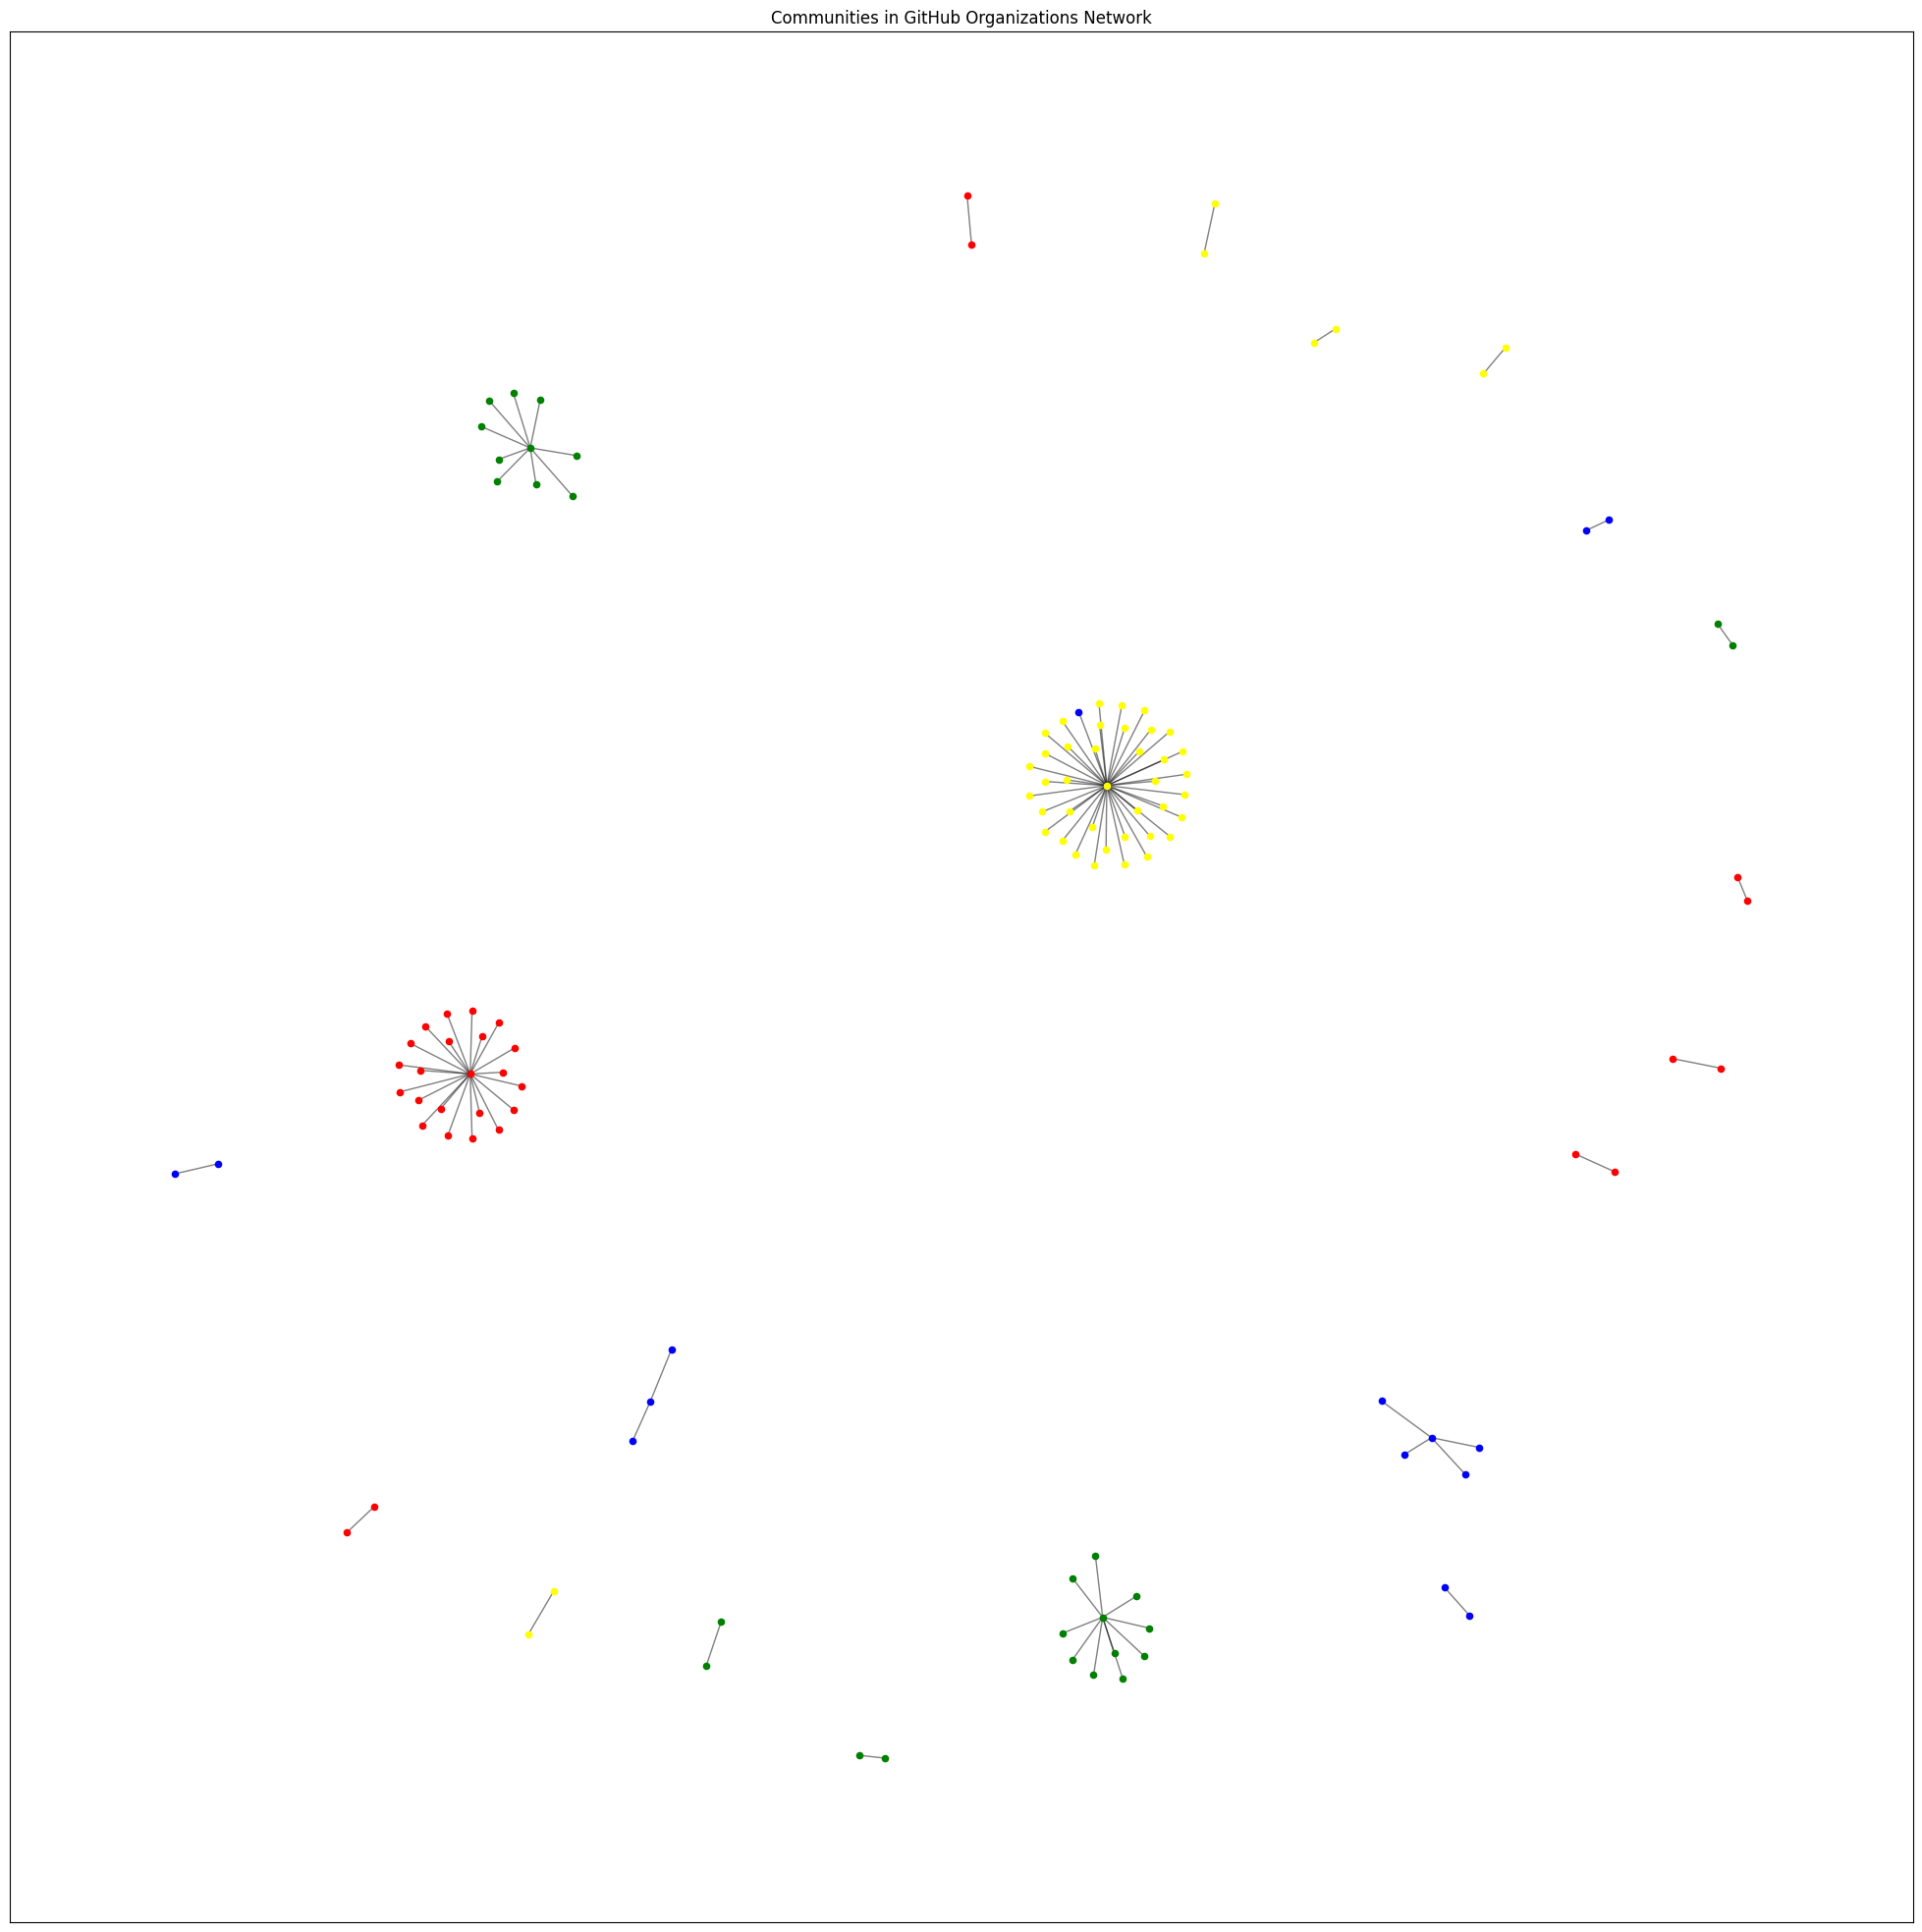

In [11]:
# Visualize Communities
plt.figure(figsize=(25, 25))
colors = ['red', 'blue', 'green', 'yellow']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(B, pos, nodelist=list(community), node_color=colors[i % len(colors)], node_size=20)
nx.draw_networkx_edges(B, pos, alpha=0.5)
plt.title("Communities in GitHub Organizations Network")
plt.show()


## 5. Resilience and Robustness

In [12]:
# Analyze network resilience by removing nodes or edges and observing changes in connectivity
original_components = nx.number_connected_components(B)
print("Original number of connected components:", original_components)

Original number of connected components: 21


In [13]:
# Remove random nodes or edges and recheck components
B1 = B.copy()
B1.remove_node(data['member'].iloc[0])  # Removing a sample node for demonstration
new_components = nx.number_connected_components(B1)
print("New number of connected components after removal:", new_components)


New number of connected components after removal: 21


Initial number of connected components: 21
After removing 1 node(s), number of connected components: 21
After removing 2 node(s), number of connected components: 21
After removing 3 node(s), number of connected components: 21
After removing 4 node(s), number of connected components: 21
After removing 5 node(s), number of connected components: 21
After removing 6 node(s), number of connected components: 30
After removing 7 node(s), number of connected components: 30
After removing 8 node(s), number of connected components: 30
After removing 9 node(s), number of connected components: 30
After removing 10 node(s), number of connected components: 50
Total increase in connected components after removals: 29


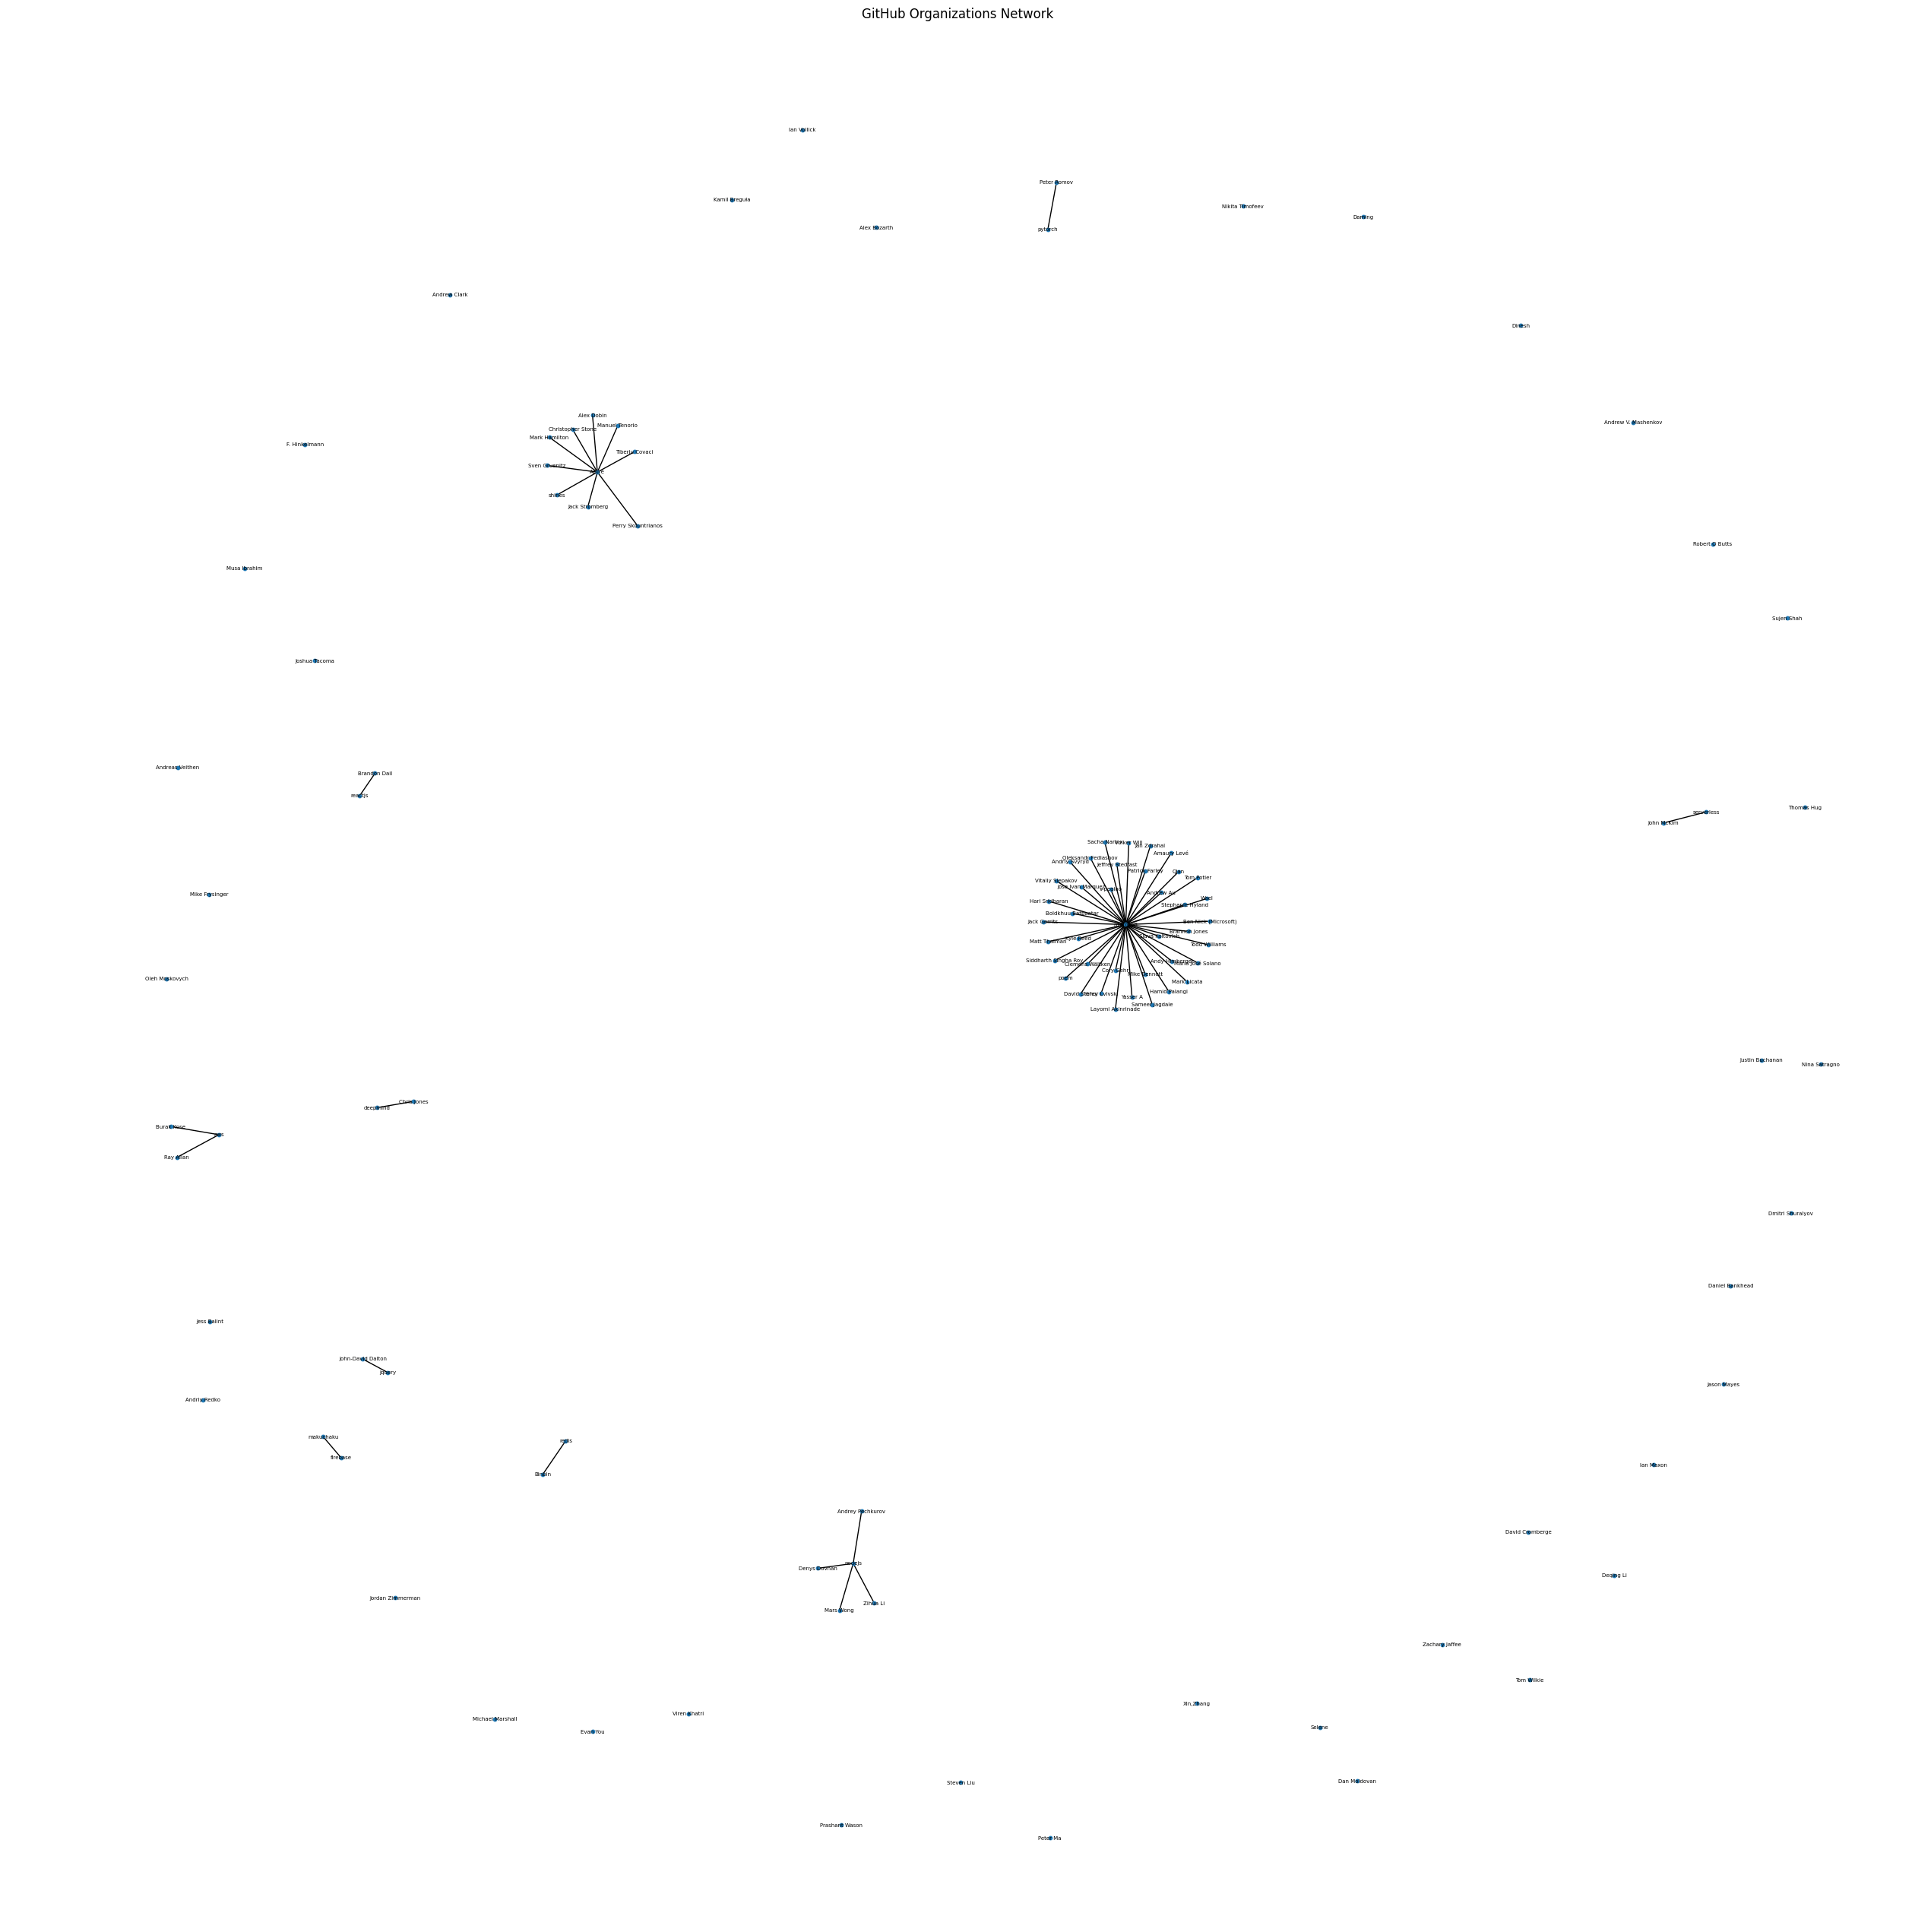

In [14]:
# Set the number of nodes to remove for robustness analysis

random.seed(10)
num_nodes_to_remove = 10

# Make a copy of the original graph to preserve it
B_copy = B.copy()

# Initial number of connected components in the copied graph before any removals
initial_components = nx.number_connected_components(B_copy)
print("Initial number of connected components:", initial_components)

# Select random nodes from the 'member' set to remove
random_nodes = random.sample(list(data['Organisation'].dropna().unique()), num_nodes_to_remove)

# Remove each node one by one from the copied graph and track the number of connected components
for i, node in enumerate(random_nodes, start=1):
    B_copy.remove_node(node)  # Remove the node from the copy
    current_components = nx.number_connected_components(B_copy)  # Count connected components after removal
    print(f"After removing {i} node(s), number of connected components:", current_components)

# Summary: measure the change in the number of connected components
print("Total increase in connected components after removals:", current_components - initial_components)



plt.figure(figsize=(25, 25))
# Generate positions for nodes using the spring layout, which places nodes based on a force-directed algorithm
pos = nx.spring_layout(B_copy)
# Draw the graph with specified positions, enabling labels for nodes, and setting node and font sizes
nx.draw(B_copy, pos, with_labels=True, node_size=10, font_size=5)
# Add a title to the plot for context
plt.title("GitHub Organizations Network")
plt.show()